In [2]:
from bs4 import BeautifulSoup, Tag
import numpy as np
import pandas as pd
import torch
import constants
import secrets
import re
import requests
import matplotlib.pyplot as plt
import pprint
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

c:\Users\trexx\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def get_jsonparsed_data(url):

    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

In [4]:
alltickers = (f"{constants.FMP_SYMBOLS_URL}?apikey={secrets.FMP_API_KEY}")
tickers = get_jsonparsed_data(alltickers)
pprint.pprint(tickers[0])

C:\Users\trexx\AppData\Local\Temp/ipykernel_4180/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


{'exchange': 'Australian Securities Exchange',
 'exchangeShortName': 'ASX',
 'name': 'Errawarra Resources Ltd',
 'price': 0.185,
 'symbol': 'ERW.AX',
 'type': 'stock'}


In [5]:
rowOfTickers = {}
for ticker in tickers:
    rowOfTickers[ticker["symbol"]] = np.nan
pprint.pprint(rowOfTickers)

{'000001.SZ': nan,
 '000002.SZ': nan,
 '000004.SZ': nan,
 '000005.SZ': nan,
 '000006.SZ': nan,
 '000007.SZ': nan,
 '000008.SZ': nan,
 '000009.SZ': nan,
 '000010.SZ': nan,
 '000011.SZ': nan,
 '000012.SZ': nan,
 '000014.SZ': nan,
 '000016.SZ': nan,
 '000017.SZ': nan,
 '000019.SZ': nan,
 '000020.KS': nan,
 '000020.SZ': nan,
 '000021.SZ': nan,
 '000023.SZ': nan,
 '000025.SZ': nan,
 '000026.SZ': nan,
 '000027.SZ': nan,
 '000028.SZ': nan,
 '000029.SZ': nan,
 '000030.SZ': nan,
 '000031.SZ': nan,
 '000032.SZ': nan,
 '000034.SZ': nan,
 '000035.SZ': nan,
 '000036.SZ': nan,
 '000037.SZ': nan,
 '000038.SZ': nan,
 '000039.SZ': nan,
 '000040.KS': nan,
 '000040.SZ': nan,
 '000042.SZ': nan,
 '000045.SZ': nan,
 '000046.SZ': nan,
 '000048.SZ': nan,
 '000049.SZ': nan,
 '000050.KS': nan,
 '000050.SZ': nan,
 '000055.SZ': nan,
 '000056.SZ': nan,
 '000058.SZ': nan,
 '000059.SZ': nan,
 '000060.SZ': nan,
 '000061.SZ': nan,
 '000062.SZ': nan,
 '000063.SZ': nan,
 '000065.SZ': nan,
 '000066.SZ': nan,
 '000068.SZ'

In [35]:
pageNum = 0
articleCount = 1
df = pd.DataFrame()
while len(df) < 100:
    url_sentiment = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page={pageNum}&apikey=b0446da02c01a0943a01730dc2343e34")
    sentiment_news = get_jsonparsed_data(url_sentiment)
    if len(sentiment_news) == 0:
        break

    for news in sentiment_news:
        dateOnly = news["publishedDate"].split("T")[0]
        row = rowOfTickers.copy()
        row[news["symbol"]] = news["sentimentScore"]
        row["date"] = str(dateOnly)

        df = df.append(row, ignore_index=True)
        df:pd.DataFrame = df.groupby('date').mean().reset_index()
        print("article count: "+str(articleCount))
        print("DF length: " + str(len(df)))
        articleCount += 1
    pageNum += 1
    print("page " + str(pageNum))

grouped_df:pd.DataFrame = df.groupby('date').mean().reset_index()
print(grouped_df.head())

C:\Users\trexx\AppData\Local\Temp/ipykernel_6460/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


article count: 1
DF length: 1
article count: 2
DF length: 1
article count: 3
DF length: 1
article count: 4
DF length: 1
article count: 5
DF length: 2
article count: 6
DF length: 2
article count: 7
DF length: 2
article count: 8
DF length: 2
article count: 9
DF length: 2
article count: 10
DF length: 2
article count: 11
DF length: 2
article count: 12
DF length: 2
article count: 13
DF length: 2
article count: 14
DF length: 2
article count: 15
DF length: 2
article count: 16
DF length: 2
article count: 17
DF length: 2
article count: 18
DF length: 2
article count: 19
DF length: 2
article count: 20
DF length: 2
article count: 21
DF length: 2
article count: 22
DF length: 2
article count: 23
DF length: 2
article count: 24
DF length: 2
article count: 25
DF length: 2
article count: 26
DF length: 2
article count: 27
DF length: 2
article count: 28
DF length: 2
article count: 29
DF length: 2
article count: 30
DF length: 2
article count: 31
DF length: 2
article count: 32
DF length: 2
article count: 33

In [38]:
df.to_csv("alldata.csv", index=False)
print(df)

         date  KFFB  GAVAX  JDPAX  326230.KS  HRVIX  0J5H.L  002600.KS  \
0  2023-03-13   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
1  2023-03-14   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
2  2023-03-15   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
3  2023-03-16   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
4  2023-03-17   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
..        ...   ...    ...    ...        ...    ...     ...        ...   
95 2023-06-19   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
96 2023-06-20   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
97 2023-06-21   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
98 2023-06-22   0.0    0.0    0.0        0.0    0.0     0.0        0.0   
99 2023-06-23   0.0    0.0    0.0        0.0    0.0     0.0        0.0   

    8101.T  ISCTR.IS  ...  ALICE-USD  BAL-USD  BUSD-USD     VCF  SOLO-USD  \
0      0.0       0.0  ...     0.00

In [10]:
df = pd.read_csv("alldata.csv")

In [9]:
df = pd.read_csv("alldata.csv")

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])
df.fillna(0.0, inplace=True)
# Exclude the 'date' column from the iteration
columns_to_plot = df.columns.drop('date')

# Create a list of different line colors for each column
line_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Plot each column against the 'date' column
for i in range(len(columns_to_plot)):
    plt.plot(df['date'], df[columns_to_plot[i]], color=line_colors[i % len(line_colors)])

# Set the labels for x and y axes
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set the title of the plot
plt.title('Sentiment Over Time')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a legend to differentiate the lines
#plt.legend()

# Display the plot
plt.show()


KeyboardInterrupt: 

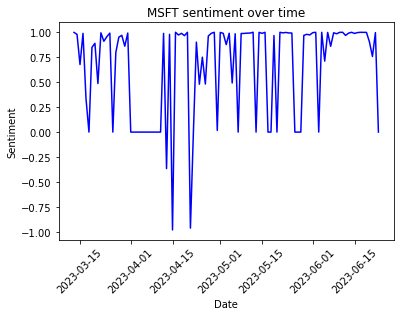

In [11]:
desiredTicker = "MSFT"
df = pd.read_csv("alldata.csv")
df['date'] = pd.to_datetime(df['date'])
df.fillna(0.0, inplace=True)
plt.plot(df["date"], df[desiredTicker], color = "blue")
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Set the title of the plot
plt.title(f'{desiredTicker} sentiment over time')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [20]:
maxmean = -1
for col in df.columns.drop("date"):
    maxmean = max(df[col].mean(), maxmean)
print(maxmean)

0.7353719697724287


In [7]:
def daily():
    current_df = pd.read_csv("alldata.csv")
    prevdate:str = current_df.iloc[-1]["date"].split("T")[0]
    new_df = pd.DataFrame()

    pageNum = 0
    complete = False
    while not complete:
        url_sentiment = (f"https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page={pageNum}&apikey=b0446da02c01a0943a01730dc2343e34")
        sentiment_news = get_jsonparsed_data(url_sentiment)
        if len(sentiment_news) == 0:
            break

        for article in sentiment_news:
            if article["publishedDate"].split("T")[0] != prevdate:
                row = rowOfTickers.copy()
                row["date"] = article["publishedDate"].split("T")[0]
                row[article["symbol"]] = article["sentimentScore"]
                new_df = new_df.append(row, ignore_index=True)
                print("Getting article from: " + row["date"])
                new_df = new_df.groupby("date").mean().reset_index()
            else:
                complete = True
                break
        pageNum +=1
    current_df = current_df.append(new_df)
    current_df.fillna(0.0, inplace=True)
    current_df.to_csv("alldata.csv")
    print(current_df.tail(10))
daily()

C:\Users\trexx\AppData\Local\Temp/ipykernel_4180/1748608114.py:3: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting article from: 2023-06-30
Getting ar

In [8]:
df = pd.read_csv("alldata.csv")
print(df.columns)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.to_csv("alldata.csv")
print(df)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'KFFB', 'GAVAX', 'JDPAX',
       '326230.KS', 'HRVIX', '0J5H.L', '002600.KS',
       ...
       'MATR', 'RIVE', 'AMCC', 'MMTC', 'OAS', 'LEAP', 'ACFC', 'SLCT', 'EASI',
       'MOST'],
      dtype='object', length=56356)
      Unnamed: 0.1        date  KFFB  GAVAX  JDPAX  326230.KS  HRVIX  0J5H.L  \
0              0.0  2023-03-13   0.0    0.0    0.0        0.0    0.0     0.0   
1              1.0  2023-03-14   0.0    0.0    0.0        0.0    0.0     0.0   
2              2.0  2023-03-15   0.0    0.0    0.0        0.0    0.0     0.0   
3              3.0  2023-03-16   0.0    0.0    0.0        0.0    0.0     0.0   
4              4.0  2023-03-17   0.0    0.0    0.0        0.0    0.0     0.0   
...            ...         ...   ...    ...    ...        ...    ...     ...   
2427           0.0  2023-06-24   0.0    0.0    0.0        0.0    0.0     0.0   
2428           0.0  2023-06-24   0.0    0.0    0.0        0.0    0.0     0.0   
2429           0

In [13]:
try:
    df.drop(columns=['Unnamed: 0.0'], inplace=True)
    df.drop(columns=['Unnamed: 0.1'], inplace=True)
except:
    pass
df:pd.DataFrame = df.groupby("date").mean().reset_index()
df.to_csv("alldata.csv")
df

,date,KFFB,GAVAX,JDPAX,326230.KS,HRVIX,0J5H.L,002600.KS,8101.T,ISCTR.IS,...,MATR,RIVE,AMCC,MMTC,OAS,LEAP,ACFC,SLCT,EASI,MOST
0,2023-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2023-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2023-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2023-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2023-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000314
103,2023-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001739,0.003538,0.001769,0.003527,0.000000
104,2023-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.000062,0.001712,-0.001476,0.000000,0.000000,0.000000,0.000000,0.000000
105,2023-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001949,0.003505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
